# Running the models 

In [1]:
# Import necessary libraries
import json
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, auc, precision_recall_curve, confusion_matrix
import pandas as pd
import logging
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


## Load data 

In [3]:
merged_df = pd.read_csv('/Users/dionnespaltman/Desktop/V3/merged_df.csv', sep=',')

merged_df.drop('Unnamed: 0', axis=1, inplace=True)
merged_df.drop('Unnamed: 0.1', axis=1, inplace=True)

display(merged_df.head(5))

,ID,sum_12,sum_4567,sum_456,VVR_group,Condition,VVR_1,VVR_2,AU01_r__sum_values,AU01_r__variance,...,AU26_r__minimum,AU26_r__mean,AU26_r__mean_abs_change,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__minimum,AU45_r__mean,AU45_r__mean_abs_change
0,23,24.0,37.0,27.0,0,2,13.0,11.0,4982.48,0.425041,...,0.00,0.633284,0.076328,9231.74,0.825039,0.908316,4.91,0.00,0.627753,0.133624
1,24,23.0,37.0,28.0,0,2,12.0,11.0,9390.23,0.448366,...,0.00,1.484701,0.125851,11887.00,0.634554,0.796589,5.00,0.00,0.436942,0.098134
2,25,28.0,44.0,33.0,1,2,16.0,12.0,6954.35,0.599805,...,0.00,0.862301,0.101969,9020.78,0.750701,0.866430,4.04,0.00,0.550652,0.085720
3,26,30.0,37.0,29.0,0,1,15.0,15.0,9707.43,0.873280,...,0.00,0.552359,0.069582,6585.31,0.609348,0.780607,4.90,0.00,0.371673,0.056287
4,27,22.0,39.0,31.0,1,2,11.0,11.0,21049.90,1.475421,...,-3.92,0.142027,0.386527,23027.73,1.160635,1.077328,5.04,-4.29,1.094318,0.231853


In [4]:
# Count the number of instances of people in VVR_group = 1 and VVR_group = 0
count_vvr_group = merged_df['VVR_group'].value_counts()

# Print the counts
print("Number of instances in VVR_group = 1:", count_vvr_group[1])
print("Number of instances in VVR_group = 0:", count_vvr_group[0])


Number of instances in VVR_group = 1: 26
Number of instances in VVR_group = 0: 85


In [7]:
with open('/Users/dionnespaltman/Desktop/V3/columns_action_units.json', 'r') as f:
    columns_action_units = json.load(f)

print(len(columns_action_units))
print(columns_action_units)

119
['AU01_r__sum_values', 'AU01_r__variance', 'AU01_r__standard_deviation', 'AU01_r__maximum', 'AU01_r__minimum', 'AU01_r__mean', 'AU01_r__mean_abs_change', 'AU02_r__sum_values', 'AU02_r__variance', 'AU02_r__standard_deviation', 'AU02_r__maximum', 'AU02_r__minimum', 'AU02_r__mean', 'AU02_r__mean_abs_change', 'AU04_r__sum_values', 'AU04_r__variance', 'AU04_r__standard_deviation', 'AU04_r__maximum', 'AU04_r__minimum', 'AU04_r__mean', 'AU04_r__mean_abs_change', 'AU05_r__sum_values', 'AU05_r__variance', 'AU05_r__standard_deviation', 'AU05_r__maximum', 'AU05_r__minimum', 'AU05_r__mean', 'AU05_r__mean_abs_change', 'AU06_r__sum_values', 'AU06_r__variance', 'AU06_r__standard_deviation', 'AU06_r__maximum', 'AU06_r__minimum', 'AU06_r__mean', 'AU06_r__mean_abs_change', 'AU07_r__sum_values', 'AU07_r__variance', 'AU07_r__standard_deviation', 'AU07_r__maximum', 'AU07_r__minimum', 'AU07_r__mean', 'AU07_r__mean_abs_change', 'AU09_r__sum_values', 'AU09_r__variance', 'AU09_r__standard_deviation', 'AU09

## Scatterplot 

In [8]:
# import statements 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
# Count the number of instances of people in VVR_group = 1 and VVR_group = 0
count_vvr_group = merged_df['VVR_group'].value_counts()

# Print the counts
print("Number of instances in VVR_group = 1:", count_vvr_group[1])
print("Number of instances in VVR_group = 0:", count_vvr_group[0])


Number of instances in VVR_group = 1: 26
Number of instances in VVR_group = 0: 85


In [10]:
columns_names_x = merged_df.columns
print(columns_names_x)

Index(['ID', 'sum_12', 'sum_4567', 'sum_456', 'VVR_group', 'Condition',
       'VVR_1', 'VVR_2', 'AU01_r__sum_values', 'AU01_r__variance',
       ...
       'AU26_r__minimum', 'AU26_r__mean', 'AU26_r__mean_abs_change',
       'AU45_r__sum_values', 'AU45_r__variance', 'AU45_r__standard_deviation',
       'AU45_r__maximum', 'AU45_r__minimum', 'AU45_r__mean',
       'AU45_r__mean_abs_change'],
      dtype='object', length=127)


In [67]:
# Extract features and target variable
columns_to_drop = [ 'ID', 'sum_12', 'sum_4567', 'sum_456', 'VVR_group', 'Condition', 'VVR_1', 'VVR_2'] 
# X = merged_df.drop(columns_to_drop, axis=1)
# y = merged_df['VVR_group']

X = merged_df.drop(columns_to_drop, axis=1)
y = merged_df['VVR_group']

print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

print(len(X))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

Original dataset shape Counter({0: 85, 1: 26})
Resampled dataset shape Counter({0: 85, 1: 85})
111


In [76]:
# Count the number of NaN values in each column of the DataFrame
nan_counts = y_res.isna().sum()

# Print columns with NaN values
nan_columns = nan_counts[nan_counts > 0]
print("Columns with NaN values:")
print(nan_columns)


Columns with NaN values:
[]


In [77]:
# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components (2 for 2D scatter plot)
X_pca = pca.fit_transform(X_scaled)

In [78]:
print(len(columns_action_units))
print(columns_action_units)

119
['AU01_r__sum_values', 'AU01_r__variance', 'AU01_r__standard_deviation', 'AU01_r__maximum', 'AU01_r__minimum', 'AU01_r__mean', 'AU01_r__mean_abs_change', 'AU02_r__sum_values', 'AU02_r__variance', 'AU02_r__standard_deviation', 'AU02_r__maximum', 'AU02_r__minimum', 'AU02_r__mean', 'AU02_r__mean_abs_change', 'AU04_r__sum_values', 'AU04_r__variance', 'AU04_r__standard_deviation', 'AU04_r__maximum', 'AU04_r__minimum', 'AU04_r__mean', 'AU04_r__mean_abs_change', 'AU05_r__sum_values', 'AU05_r__variance', 'AU05_r__standard_deviation', 'AU05_r__maximum', 'AU05_r__minimum', 'AU05_r__mean', 'AU05_r__mean_abs_change', 'AU06_r__sum_values', 'AU06_r__variance', 'AU06_r__standard_deviation', 'AU06_r__maximum', 'AU06_r__minimum', 'AU06_r__mean', 'AU06_r__mean_abs_change', 'AU07_r__sum_values', 'AU07_r__variance', 'AU07_r__standard_deviation', 'AU07_r__maximum', 'AU07_r__minimum', 'AU07_r__mean', 'AU07_r__mean_abs_change', 'AU09_r__sum_values', 'AU09_r__variance', 'AU09_r__standard_deviation', 'AU09

In [79]:
print(X_pca.shape)

# display(X_pca)


(170, 2)


In [80]:
# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

display(pca_df)

,PC1,PC2
0,0.152186,0.414424
1,2.072262,-5.480963
2,-0.232614,0.186988
3,-2.009491,2.570176
4,37.461036,17.269162
...,...,...
165,0.879969,-3.830848
166,-3.262589,9.101354
167,1.179194,-3.780990
168,-3.376890,-1.055281


In [82]:
# Concatenate the principal components with the target variable
final_df = pd.concat([pca_df, y_res], axis=1)

display(final_df)

,PC1,PC2,VVR_group
0,0.152186,0.414424,0
1,2.072262,-5.480963,0
2,-0.232614,0.186988,1
3,-2.009491,2.570176,0
4,37.461036,17.269162,1
...,...,...,...
165,0.879969,-3.830848,1
166,-3.262589,9.101354,1
167,1.179194,-3.780990,1
168,-3.376890,-1.055281,1


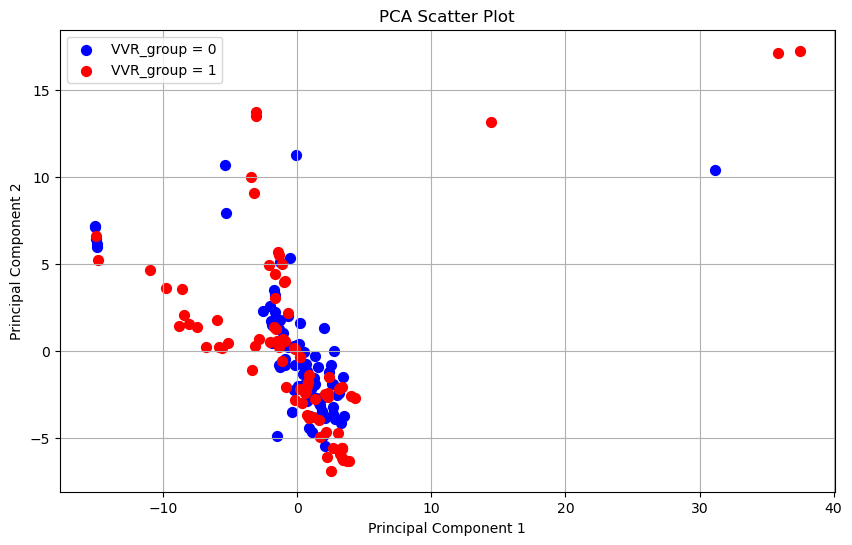

In [83]:
# Plot the data
plt.figure(figsize=(10, 6))
targets = [0, 1]  # VVR_group labels
colors = ['b', 'r']  # Blue for VVR_group = 0, Red for VVR_group = 1
for target, color in zip(targets, colors):
    indices_to_keep = final_df['VVR_group'] == target
    plt.scatter(final_df.loc[indices_to_keep, 'PC1'],
                final_df.loc[indices_to_keep, 'PC2'],
                c=color,
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.legend(['VVR_group = 0', 'VVR_group = 1'])
plt.grid(True)
plt.show()

## SMOTE 

In [11]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


In [21]:
columns_to_drop = [ 'ID', 'sum_12', 'sum_4567', 'sum_456', 'VVR_group', 'Condition', 'VVR_1', 'VVR_2'] 

X = merged_df.drop(columns_to_drop, axis=1)
y = merged_df['VVR_group']

print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42, k_neighbors=10)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

new_merged_df = pd.merge(X_res, y_res, how='outer', left_index=True, right_index=True)

# Check the shape of the new merged DataFrame
print('New merged dataset shape:', new_merged_df.shape)

Original dataset shape Counter({0: 85, 1: 26})
Resampled dataset shape Counter({0: 85, 1: 85})
New merged dataset shape: (170, 120)


## Train test split & SMOTE
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/ 

In [22]:
train, test = train_test_split(new_merged_df, test_size=0.2, random_state=123)
train, val = train_test_split(train, stratify=train['VVR_group'], random_state=123)

# train.drop('Unnamed: 0', axis=1, inplace=True)
# test.drop('Unnamed: 0', axis=1, inplace=True)
# val.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
print(train.shape)
display(train.head(5))

(102, 120)


,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__minimum,AU01_r__mean,AU01_r__mean_abs_change,AU02_r__sum_values,AU02_r__variance,AU02_r__standard_deviation,...,AU26_r__mean,AU26_r__mean_abs_change,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__minimum,AU45_r__mean,AU45_r__mean_abs_change,VVR_group
25,7386.360000,0.287824,0.536492,3.750000,0.000000,0.321664,0.048513,3672.970000,0.155122,0.393855,...,0.833013,0.087538,14474.730000,0.871646,0.933620,5.000000,0.000000,0.630350,0.075590,0
95,13901.900000,0.698783,0.835932,5.000000,0.000000,0.505193,0.052724,6025.880000,0.287115,0.535832,...,0.728433,0.081140,16250.110000,0.856558,0.925504,4.770000,0.000000,0.590527,0.073053,0
104,13389.660000,0.623387,0.789549,5.000000,0.000000,0.420503,0.038294,7698.450000,0.323441,0.568718,...,0.604497,0.075130,13119.810000,0.465397,0.682200,4.990000,0.000000,0.412028,0.105753,0
51,2626.030000,0.069718,0.264041,2.670000,0.000000,0.170201,0.029826,1213.570000,0.031769,0.178240,...,0.485499,0.073895,6862.660000,0.763101,0.873557,5.000000,0.000000,0.444790,0.074526,0
140,9574.851915,0.310292,0.486896,3.911445,0.091369,0.382382,0.040435,5348.440209,0.266558,0.451281,...,0.725178,0.070051,14667.317049,1.039244,0.891066,3.940939,0.120864,0.585459,0.089912,1


In [24]:
print(test.shape)
display(test.head(5))

(34, 120)


,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__minimum,AU01_r__mean,AU01_r__mean_abs_change,AU02_r__sum_values,AU02_r__variance,AU02_r__standard_deviation,...,AU26_r__mean,AU26_r__mean_abs_change,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__minimum,AU45_r__mean,AU45_r__mean_abs_change,VVR_group
91,10080.699681,3.081488e-33,5.551115e-17,0.387183,0.387183,0.387183,0.000000,4827.427886,0.000000,0.000000,...,0.743851,0.000000,13334.822585,0.000000,0.000000,0.512169,0.512169,0.512169,0.000000,0
72,3827.350000,1.184572e-01,3.441761e-01,3.810000,0.000000,0.191387,0.034012,1725.490000,0.041918,0.204738,...,1.026476,0.095782,4196.810000,0.182862,0.427624,4.370000,0.000000,0.209861,0.053974,0
138,9095.201215,3.367915e-01,5.655581e-01,5.000000,0.000000,0.343714,0.045068,4177.574362,0.119742,0.340611,...,1.074934,0.128395,10523.167973,0.665635,0.797572,4.669121,0.000000,0.402666,0.084531,1
53,6346.820000,3.263775e-01,5.712946e-01,5.000000,0.000000,0.312190,0.053038,3296.680000,0.143391,0.378670,...,1.109904,0.114176,11125.310000,0.841040,0.917082,4.690000,0.000000,0.547236,0.081270,1
146,16092.248756,6.294317e-01,7.923028e-01,5.000000,0.000000,0.468987,0.050951,5760.410767,0.163067,0.401618,...,0.907136,0.125187,22091.597206,1.052882,0.982045,4.558235,0.000000,0.625780,0.111774,1


In [25]:
print(val.shape)
display(val.head(5))

(34, 120)


,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__minimum,AU01_r__mean,AU01_r__mean_abs_change,AU02_r__sum_values,AU02_r__variance,AU02_r__standard_deviation,...,AU26_r__mean,AU26_r__mean_abs_change,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__minimum,AU45_r__mean,AU45_r__mean_abs_change,VVR_group
24,7526.610000,0.855192,0.924766,5.000000,0.000000,0.477971,0.037601,3025.180000,0.278521,0.527751,...,0.331864,0.052974,6038.500000,0.397545,0.630511,3.620000,0.000000,0.383470,0.074761,0
115,6839.468696,0.296943,0.544924,4.997811,0.000000,0.298113,0.036545,3078.467079,0.137966,0.371437,...,2.046326,0.065802,7650.297683,0.356477,0.596676,4.182978,0.000000,0.333673,0.075604,1
143,10752.417353,0.288624,0.452895,3.665341,0.112026,0.382717,0.037612,5859.051801,0.247944,0.419768,...,0.726482,0.065159,16085.232407,0.966672,0.828841,3.701504,0.148189,0.580341,0.083633,1
94,13911.570000,0.930787,0.964773,5.000000,0.000000,0.604037,0.050943,4005.760000,0.172065,0.414807,...,0.779323,0.088858,10158.120000,0.525558,0.724954,4.040000,0.000000,0.441063,0.057725,0
105,17123.560000,1.294928,1.137949,5.000000,0.000000,0.661218,0.042586,7521.490000,0.472388,0.687305,...,0.671385,0.069372,15141.360000,0.816148,0.903409,4.480000,0.000000,0.584676,0.062871,0


## Define featurizer 

In [26]:
# Adding VVR stage 1 and 2 to the featurizers
# columns_action_units.append('VVR_1')
# columns_action_units.append('VVR_2')
# print(columns_action_units)

featurizer = ColumnTransformer(transformers=[("numeric", StandardScaler(), columns_action_units)], remainder='drop')

print(featurizer)

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 ['AU01_r__sum_values', 'AU01_r__variance',
                                  'AU01_r__standard_deviation',
                                  'AU01_r__maximum', 'AU01_r__minimum',
                                  'AU01_r__mean', 'AU01_r__mean_abs_change',
                                  'AU02_r__sum_values', 'AU02_r__variance',
                                  'AU02_r__standard_deviation',
                                  'AU02_r__maximum', 'AU02_r__minimum',
                                  'AU02_r__mean', 'AU02_r__mean_abs_change',
                                  'AU04_r__sum_values', 'AU04_r__variance',
                                  'AU04_r__standard_deviation',
                                  'AU04_r__maximum', 'AU04_r__minimum',
                                  'AU04_r__mean', 'AU04_r__mean_abs_change',
                                  'AU05_r__sum_values', 'AU05_r__varian

## Define models  

In [27]:
# dummy = make_pipeline(featurizer, DummyClassifier(strategy='most_frequent'))
# rf = make_pipeline(featurizer, RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=0))
# svm = make_pipeline(featurizer, SVC())
# multiclass_svm = make_pipeline(featurizer, SVC(decision_function_shape='ovr'))
# xgb = make_pipeline(featurizer, XGBClassifier())
# mlp = make_pipeline(featurizer, MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))

# models = {
#     "Dummy": dummy,
#     "RandomForest": rf,
#     "SVM": svm,
#     "Multiclass SVM": multiclass_svm,
#     "XGBoost": xgb,
#     "MLP": mlp
# }


from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

dummy = make_pipeline(featurizer, DummyClassifier(strategy='most_frequent'))
rf = make_pipeline(featurizer, RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=0))
svm = make_pipeline(featurizer, SVC())
multiclass_svm = make_pipeline(featurizer, SVC(decision_function_shape='ovr'))
xgb = make_pipeline(featurizer, XGBClassifier())
mlp = make_pipeline(featurizer, MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))

models = {
    "Dummy": dummy,
    "RandomForest": rf,
    "SVM": svm,
    "Multiclass SVM": multiclass_svm,
    "XGBoost": xgb,
    "MLP": mlp
}


## Evaluate 

In [36]:
# def evaluate_model(model, X, y):
#     """
#     Evaluate the model's performance
#     """
#     model.fit(X, y)
#     y_probs = model.predict_proba(X)[:, 1]
#     precision = precision_score(y, model.predict(X))
#     recall = recall_score(y, model.predict(X))
#     f1 = f1_score(y, model.predict(X))
#     precision_curve, recall_curve, _ = precision_recall_curve(y, y_probs)
#     auc_pr = auc(recall_curve, precision_curve)
#     cm = confusion_matrix(y, model.predict(X))
    
#     logging.info(f"Precision: {precision}")
#     logging.info(f"Recall: {recall}")
#     logging.info(f"F1-score: {f1}")
#     logging.info(f"AUC-PR score: {auc_pr}")
#     logging.info(f"Confusion Matrix:")
#     logging.info(cm)

## Main

In [28]:
# Set logging level to INFO
logging.getLogger().setLevel(logging.INFO)

# merged_df = load_data()
# train, val, test = split_data(merged_df)
# columns_action_units = load_columns()
# featurizer = define_featurizer(columns_action_units)
# models = define_models(featurizer)

# logging.info("Applying SMOTE to handle class imbalance")
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(train.drop('VVR_group', axis=1), train['VVR_group'].values)
# logging.info("X_res, y_res:", X_res.shape, y_res.shape)
# train_resampled = pd.DataFrame(X_res, columns=train.drop('VVR_group', axis=1).columns)
# train_resampled['VVR_group'] = y_res

logging.info("Fitting models")

for name, model in models.items():
    model.fit(train.drop('VVR_group', axis=1), train['VVR_group'].values)
    logging.info(f"Evaluating {name} on validation data")
    pred = model.predict(val.drop('VVR_group', axis=1))
    accuracy = accuracy_score(val['VVR_group'].values, pred)
    report = classification_report(val['VVR_group'].values, pred)
    cm = confusion_matrix(val['VVR_group'].values, pred)
    
    logging.info(f"{name} Accuracy: {accuracy}")
    logging.info(f"{name} Classification Report:")
    logging.info(report)
    logging.info(f"{name} Confusion Matrix:")
    logging.info(cm)

best_model_name = max(models, key=lambda x: accuracy_score(val['VVR_group'].values, models[x].predict(val.drop('VVR_group', axis=1))))
best_model = models[best_model_name]

logging.info(f"Predicting on test using best model: {best_model_name}")

pred = best_model.predict(test.drop('VVR_group', axis=1))

accuracy = accuracy_score(test['VVR_group'].values, pred)
report = classification_report(test['VVR_group'].values, pred)
cm = confusion_matrix(test['VVR_group'].values, pred)

logging.info(f"{best_model_name} Accuracy on Test Data: {accuracy}")
logging.info(f"{best_model_name} Classification Report on Test Data:")
logging.info(report)
logging.info(f"{best_model_name} Confusion Matrix:")
logging.info(cm)


INFO:root:Fitting models
INFO:root:Evaluating Dummy on validation data
/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

## ... 

## ... 